# <u><font color= 'blue'>Image Filtering</font> </u>
### <i>Practical Assignment 3, EE210 (Spring 2017) </i>
___
A notebook by ___Shashwat Shukla___ 
___
__Required Packages:__ Python(2.7+), NumPy, OpenCV(cv2), Matplotlib
___

In this assignment, we observe the effect of different 2D filters applied on images. Both the spatial and spectral effects are studied. From our observations we can then assign uses/functionality to different filters.

A total of nine popularly used filters are applied to the images. 

First let's load an image and also display the magnitude plot of it's frequency spectrum. The frequency spectrum is computed via a 2D FFT.

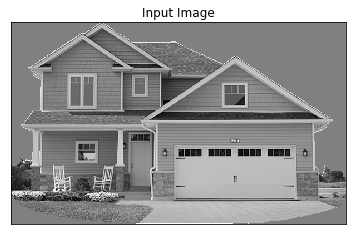

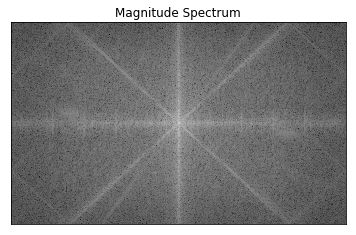

In [2]:
%matplotlib inline
# Import packages
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Input image
img = cv2.imread('house.png', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Next, we specify all nine filters that we are going to apply on the image. They are also plotted in the spatial domain.

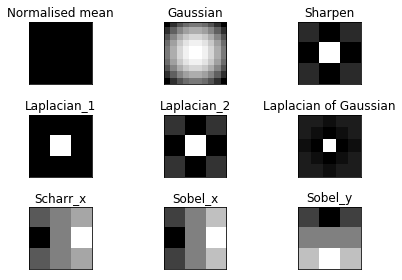

In [3]:
# Normalised averaging filter
mean = (1. / 9) * np.ones((3, 3))

# Guassian filter
x = cv2.getGaussianKernel(10, 10)
gaussian = x * x.T

# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Edge detecting filters

# Laplacian_1
laplacian_1 = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

# Laplacian_2
laplacian_2 = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

# Laplacian of Gaussian
lapguass = np.array([[0, 0, -1, 0, 0],
                     [0, -1, -2, -1, 0],
                     [-1, -2, 16, -2, -1],
                     [0, -1, -2, -1, 0],
                     [0, 0, -1, 0, 0]])

# Scharr along x axis
scharr = np.array([[-3, 0, 3],
                   [-10, 0, 10],
                   [-3, 0, 3]])
# Sobel along x axis
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
# Sobel along y axis
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])


filters = [mean, gaussian, sharpen, laplacian_1, laplacian_2, lapguass, scharr,
           sobel_x, sobel_y]
filter_name = ['Normalised mean', 'Gaussian', 'Sharpen', 'Laplacian_1',
               'Laplacian_2', 'Laplacian of Gaussian',
               'Scharr_x', 'Sobel_x', 'Sobel_y']

for i in xrange(9):
    plt.subplot(3, 3, i + 1), plt.imshow(filters[i], cmap='gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

Next, we apply these filters to the input image and plot the outputs. The magnitude of the frequency spectrum of the output image after filtering is also depicted.

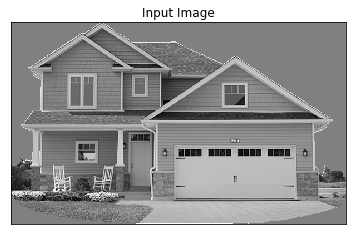

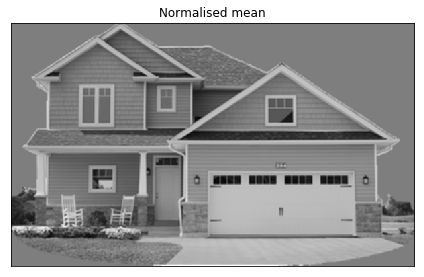

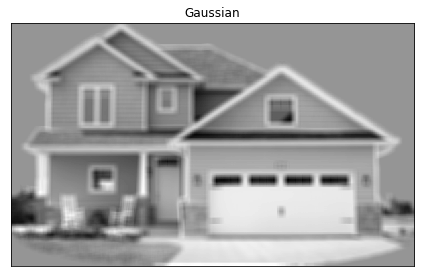

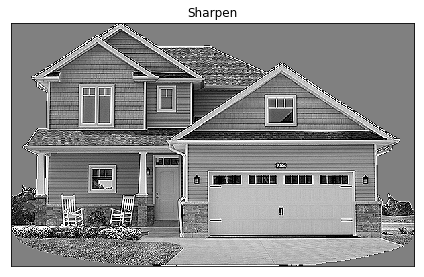

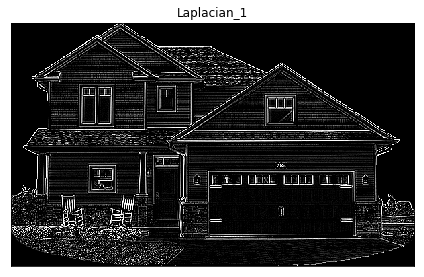

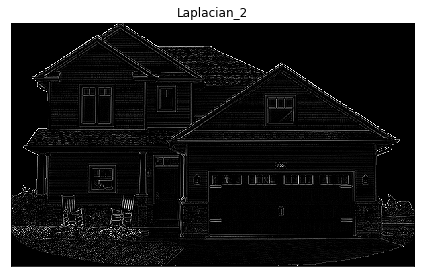

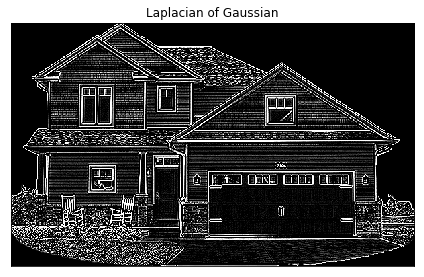

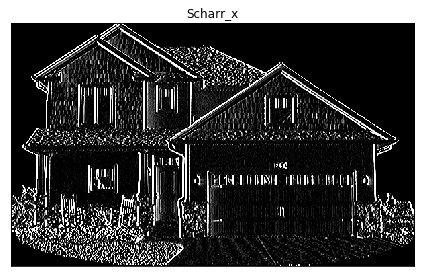

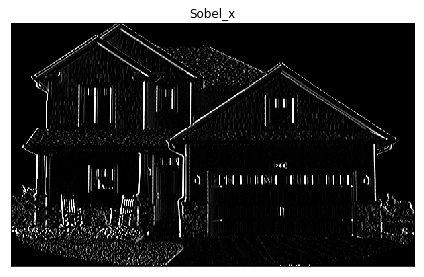

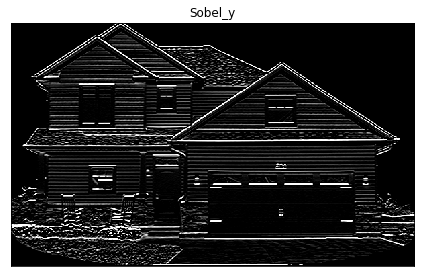

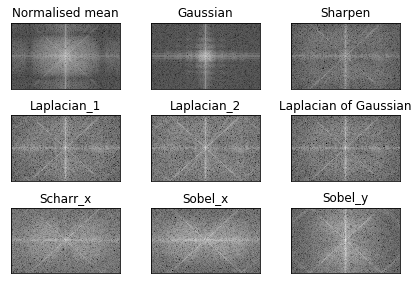

In [4]:
out = [cv2.filter2D(img, -1, x) for x in filters]

outfft = [np.fft.fft2(x) for x in out]
outfftshift = [np.fft.fftshift(x) for x in outfft]
out_mag = [20 * np.log(np.abs(x)) for x in outfftshift]

plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

for i in xrange(9):
    plt.imshow(out[i], cmap='gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

for i in xrange(9):
    plt.subplot(3, 3, i + 1), plt.imshow(out_mag[i], cmap='gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

These filters applied to a different image give:

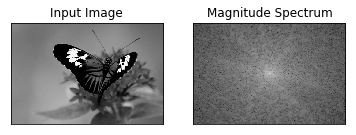

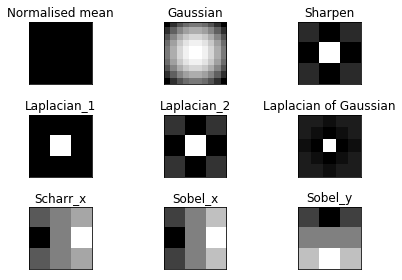

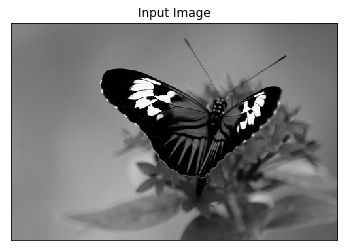

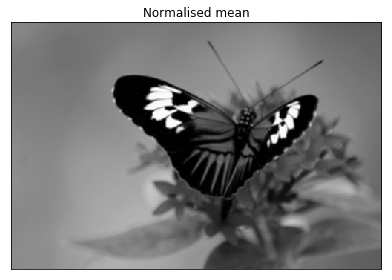

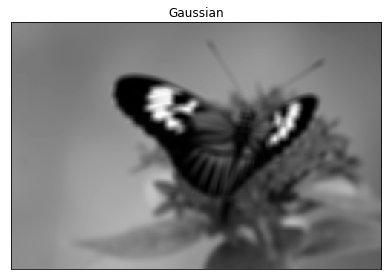

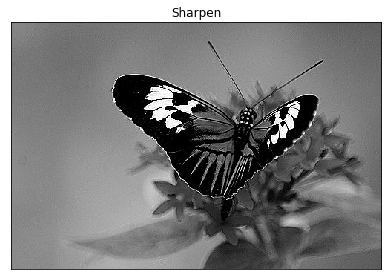

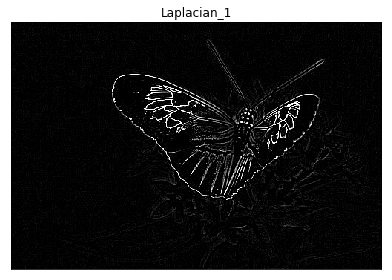

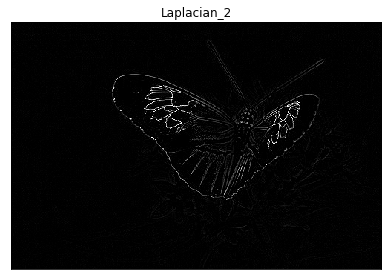

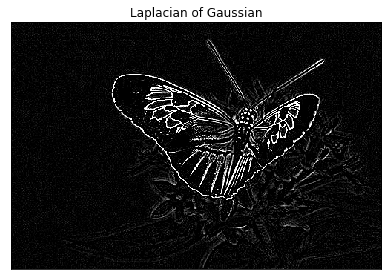

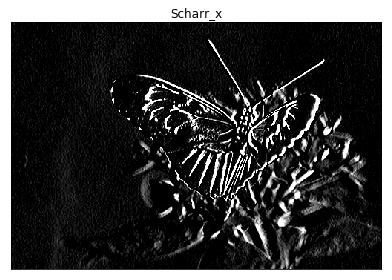

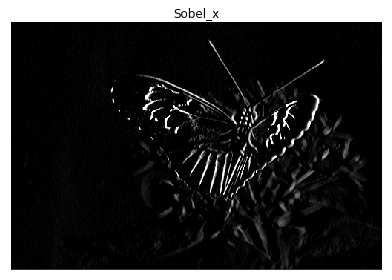

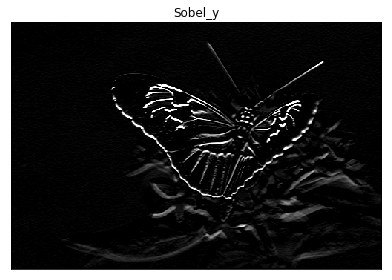

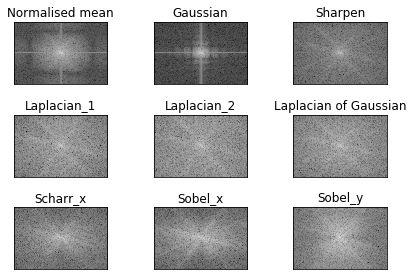

In [5]:
img = cv2.imread('butterfly.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

out = [cv2.filter2D(img, -1, x) for x in filters]

outfft = [np.fft.fft2(x) for x in out]
outfftshift = [np.fft.fftshift(x) for x in outfft]
out_mag = [20 * np.log(np.abs(x)) for x in outfftshift]

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

for i in xrange(9):
    plt.subplot(3, 3, i + 1), plt.imshow(filters[i], cmap='gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

for i in xrange(9):
    plt.imshow(out[i], cmap='gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

for i in xrange(9):
    plt.subplot(3, 3, i + 1), plt.imshow(out_mag[i], cmap='gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

We now proceed to discuss the general properties of these filters.

1) **Normalised Mean**

Also called a box blur, this convolutional kernel has an averaging effect. Each pixel of the original image is replaced by the average of the pixel values in a 3x3 grid centered around this pixel. Hence it also has a blurring effect. 

Note that the sum of values in the matrix is one. This is important as it means that in a flat region, it does not increase or decrease the intensity of the image there. 

This is an example of a low pass filter, and is essentially allowing the 'DC value' to go through and is filtering out higher spatial frequencies.

2) **Gaussian blur**

This filter is a discretised approximation to a 2D-Gaussian (with some fixed variance) centered at (2,2) and is also a low pass filter, having a smooth blurring effect on the image. 

In addition to being circularly symmetric, the Gaussian blur can be applied to a two-dimensional image as two independent one-dimensional calculations, and so is called a separable filter.

Gaussian blurring has many desirable properties and is routinely used in graphics software to reduce image noise and reduce image detail. Gaussian blurring is commonly used when reducing the size of an image. When downsampling an image, it is common to apply a low-pass filter to the image prior to resampling. This is to ensure that spurious high-frequency information does not appear in the downsampled image (aliasing). Gaussian blurs have nice properties, such as having no sharp edges, and thus do not introduce ringing into the filtered image.

3) **Sharpen**

As is evident from the matrix for this kernel, it is looking for horizontal and vertical lines. Hence it sharpens edges in the picture and increases general contrast of the image.

4) **Laplacian**

The laplacian is the second spatial derivative of the image. The Laplacian of an image highlights regions of rapid intensity change and is therefore often used for edge detection.

It is extremely sensitive to noise, so it isn't used as much as other operators. 
The laplacian with and without diagonals has been used above. 

Note that it is a high pass filter, as edges can be thought of deltas in one direction of space (and flat in the orthogonal direction) and indeed correspond to a high spatial frequency in a direction orthogonal to the edge. 

5) **Laplacian of Guassian**

The Laplacian is often applied to an image that has first been smoothed with something approximating a Gaussian smoothing filter in order to reduce its sensitivity to noise. This is what has been done here also. First a Gaussian kernel is taken and it is convolved with a Laplacian kernel to generate a kernel whose response, as we know from the property of LTI systems is the response obtained by first convolving the image with a Gaussian kernel and then with a Laplacian kernel.

In both examples above, this filter detects edges more clearly than plain laplacian kernels.
It is also a high pass filter, and detects edges.

6) **Sobel and Scharr**

The Sobel filter, sometimes called the Sobel–Feldman operator, is an edge detecting kernel. It is also more noise tolerant than the Laplacian. It has an x-component and a y-component. 

The Sobel–Feldman operator, while reducing artifacts associated with a pure central differences operator, does not have perfect rotational symmetry. Scharr looked into optimizing this property. Scharr operators result from an optimization that minimizes weighted mean squared angular error in the Fourier domain. This optimization is done under the condition that resulting filters are numerically consistent.


## A general comment about the output from image kernels

Looking at the edge detection kernels above, we see that the kernels that detect edges say in the x-direction, themselves have an edge along the x-axis. 
This allows us to draw a much more general inference about kernels: <br/>
**The output of a kernel when applied at a point on an image, is high when that region of the image is similar to the kernel itself.**

This allows to easily design rudimentary filters to identify certain features in an image. For example, if we want a filter that gives a high output if there is a line tilted at 45 degrees wrt the x-axis, then we can use:

[0 0 1] <br/>
[0 1 0] <br/>
[1 0 0]

Note that this kernel has an edge titled at 45 degrees wrt the x-axis. 

Similar reasoning allows us to understand why the normalised mean has all equal entries, and why the laplacian fiters are so sharply peaked at the center.

This principle is also very helpful in understanding how Convolutional Neural Networks work, discussed in the next section.

## A contemporary application of image kernels: Convolutional Neural Networks (CNNs)

Machine Learning today is a burgeoning field of research that has given the world a mind-boggling set of tools to solve data-intensive problems in very diverse fields ranging from Medical Imaging to Finance, to Image and Video Analytics and so much more. 

At the forefront today are so called Deep Learning techniques. These are methods that use fully connected Neural Networks, usually trained via backpropogation and the choice of a suitable loss function (usually LMS or Cross-entropy).

Convolutional Neural Networks are a class of Deep Neural Nets that have emerged as the most successful learning paradigm for almost all image and video related tasks. At their heart lie a vast array of 2D image kernels. Each neuron in a CNN infact is performing a 2D convolution, followed by the critical step of pooling. 

CNNs are particularly powerful in that they can recognize extremely complex patterns, by breaking them down into much simpler pieces. Note that any greyscale image can be thought of as being made of many tiny edges oriented in different directions. We already have edge detecting kernels that detect edges, and the orientation is also easily specified. In the first layer, CNNs identify edges, in the second layer they identify relative orientations between edges and in higher layers they identify relative orientations between complicated objects, like eyes and noses etc. to make a face.

![CNN 1](cnn1.png)
![CNN 2](cnn2.png)

This is directly inspired by how the human eye (which broadly has six layers) also detects objects. The equivalent of convolutional filters in the eye are what are called receptive fields and function exactly like oriented edge detectors. 
See the Nobel prize winning Hubel and Wiesel Cat Experiment for more information. 

![Cat Experiment](hubelcat.jpg)

The crucial thing is to learn the correct 2D kernel at each layer for each neuron and the relative weights to be assigned to each input. This is where learning algorithms like backpropogation come into play, along with a massive training and testing corpus of images. 

It is also important to note that as an image is just a collection of pixel values, many other kinds of data that are not images can be converted into equivalent images and CNNs do a great job at detecting patterns in them also. 

To visualise the kernels learnt at each layer by a CNN trained to recognise handwritten digits, go [here](http://scs.ryerson.ca/~aharley/vis/conv/). 

## Thank you!

## References

http://www.aishack.in/tutorials/image-convolution-examples/